# NSL Notebook 04

## Exercise 04.1

Importing `restart-solid.out` and plot it, to visualize inititial oscillation (for solid phase), after restart from previous simulation

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

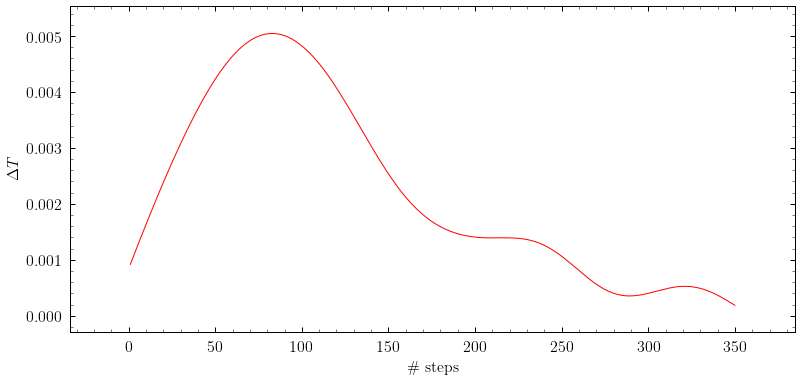

In [33]:
fig, ax = plt.subplots()

# load restart-solid.out
df1 = pd.read_csv("restart-solid.out", header=None, names=['dt'])
df1['dt'][1:].plot.line(c='r', ax=ax);

ax.set_ylabel("$\Delta T$");
ax.set_xlabel("\# steps");

## Exercise 04.2 04.3

Importing `*-solid-blk.csv` `*-liquid-blk.csv` `*-gas-blk.csv` and plot using SI

In [27]:
df = dict()

for state in ["solid", "liquid", "gas"]:
    df[state] = dict()
    for ch in "TKVE":
        df[state][ch] = pd.read_csv(f"{ch}-{state}-blk.csv", header=None, names=['v','e'])

### Solid Argon

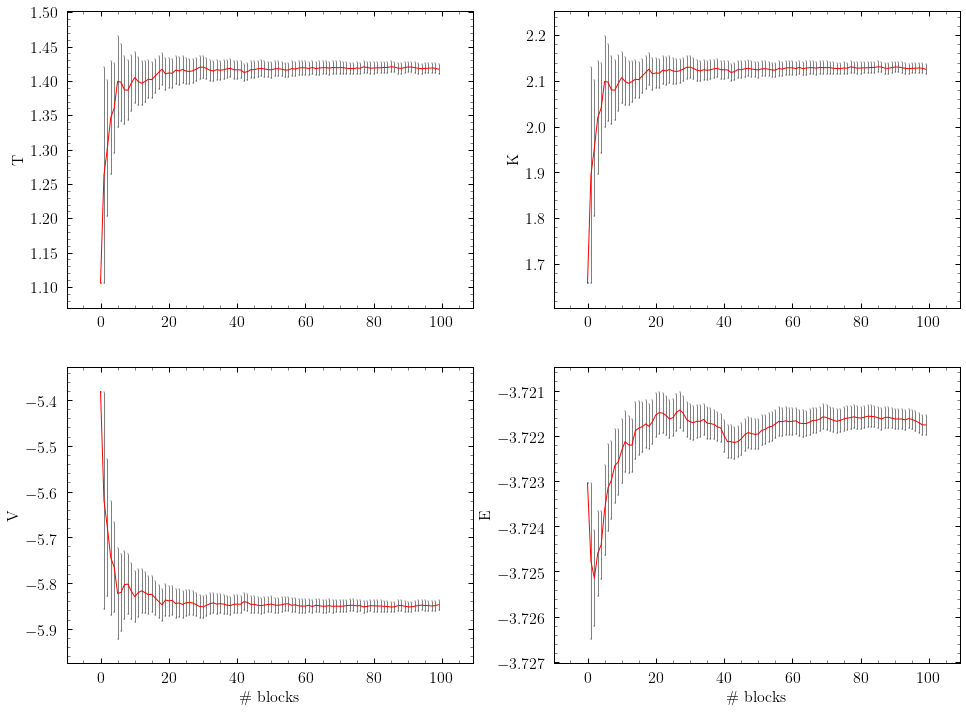

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(16,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["solid"][ch]['v'].plot.line(yerr=df["solid"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(ch)
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0

### Liquid Argon

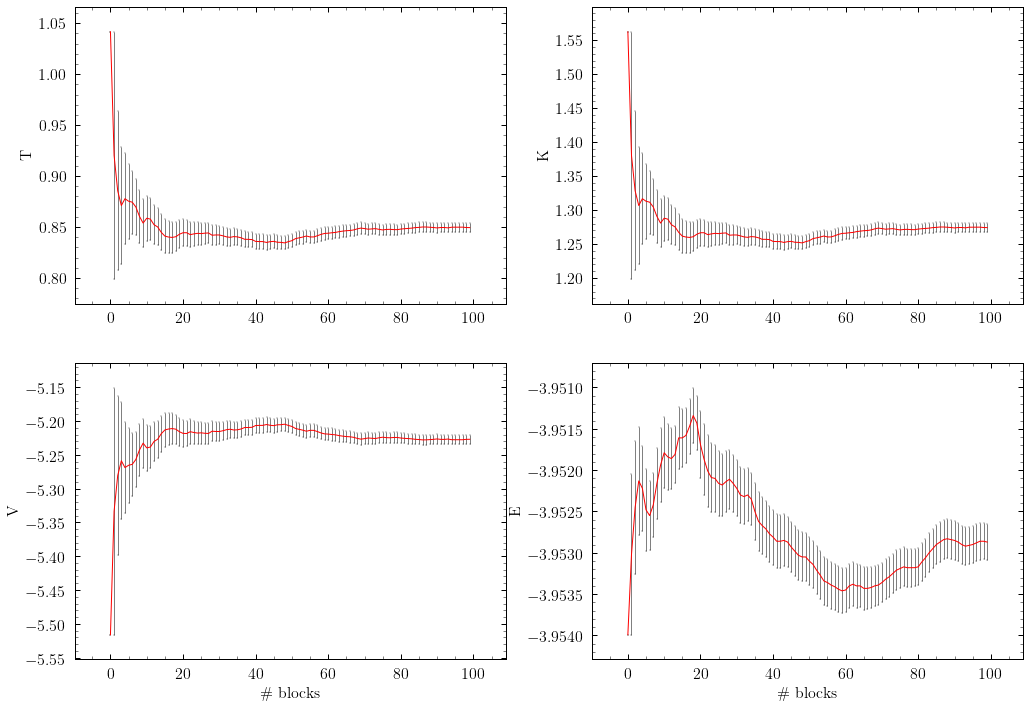

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(17,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["liquid"][ch]['v'].plot.line(yerr=df["liquid"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(ch)
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0